In [36]:
import os
import math
import imblearn
import logging
import warnings
import statistics
import numpy as np
import pandas as pd
import seaborn as sns
from collections import Counter
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score , accuracy_score , precision_score, recall_score ,confusion_matrix
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from numpy import genfromtxt
from mpl_toolkits.mplot3d import Axes3D
from imblearn.combine import SMOTEENN
%matplotlib inline




from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')

In [37]:

df = pd.read_csv('Epileptic Seizure Recognition.csv')
df.head()

,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


In [38]:
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
count,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.00000,11500.00000,11500.000000,...,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000
mean,-11.581391,-10.911565,-10.187130,-9.143043,-8.009739,-7.003478,-6.502087,-6.68713,-6.55800,-6.168435,...,-10.145739,-11.630348,-12.943478,-13.668870,-13.363304,-13.045043,-12.705130,-12.426000,-12.195652,3.000000
std,165.626284,166.059609,163.524317,161.269041,160.998007,161.328725,161.467837,162.11912,162.03336,160.436352,...,164.652883,166.149790,168.554058,168.556486,167.257290,164.241019,162.895832,162.886311,164.852015,1.414275
min,-1839.000000,-1838.000000,-1835.000000,-1845.000000,-1791.000000,-1757.000000,-1832.000000,-1778.00000,-1840.00000,-1867.000000,...,-1867.000000,-1865.000000,-1642.000000,-1723.000000,-1866.000000,-1863.000000,-1781.000000,-1727.000000,-1829.000000,1.000000
25%,-54.000000,-55.000000,-54.000000,-54.000000,-54.000000,-54.000000,-54.000000,-55.00000,-55.00000,-54.000000,...,-55.000000,-56.000000,-56.000000,-56.000000,-55.000000,-56.000000,-55.000000,-55.000000,-55.000000,2.000000
50%,-8.000000,-8.000000,-7.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.00000,-7.00000,-7.000000,...,-9.000000,-10.000000,-10.000000,-10.000000,-10.000000,-9.000000,-9.000000,-9.000000,-9.000000,3.000000
75%,34.000000,35.000000,36.000000,36.000000,35.000000,36.000000,35.000000,36.00000,36.00000,35.250000,...,34.000000,34.000000,33.000000,33.000000,34.000000,34.000000,34.000000,34.000000,34.000000,4.000000
max,1726.000000,1713.000000,1697.000000,1612.000000,1518.000000,1816.000000,2047.000000,2047.00000,2047.00000,2047.000000,...,1777.000000,1472.000000,1319.000000,1436.000000,1733.000000,1958.000000,2047.000000,2047.000000,1915.000000,5.000000


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11500 entries, 0 to 11499
Columns: 180 entries, Unnamed to y
dtypes: int64(179), object(1)
memory usage: 15.8+ MB


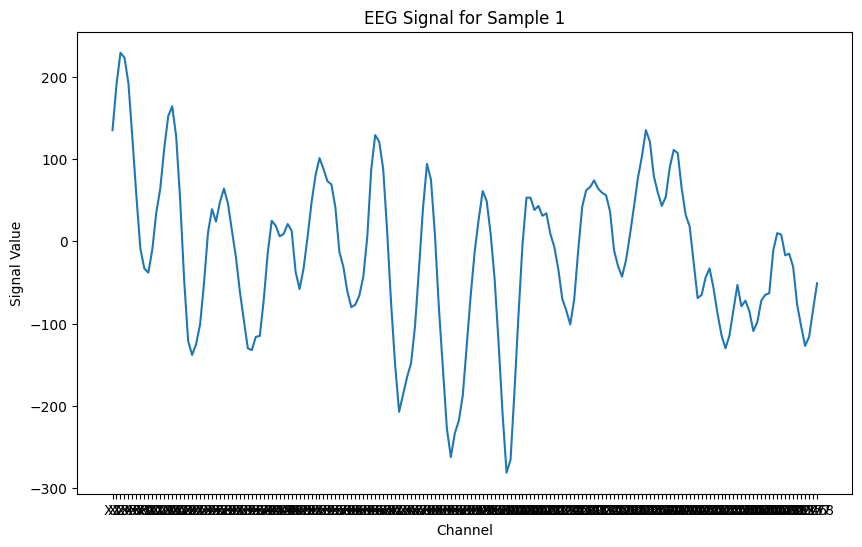

In [40]:

plt.figure(figsize=(10, 6))
plt.plot(df.iloc[0, 1:-1])  
plt.title('EEG Signal for Sample 1')
plt.xlabel('Channel')
plt.ylabel('Signal Value')
plt.show()


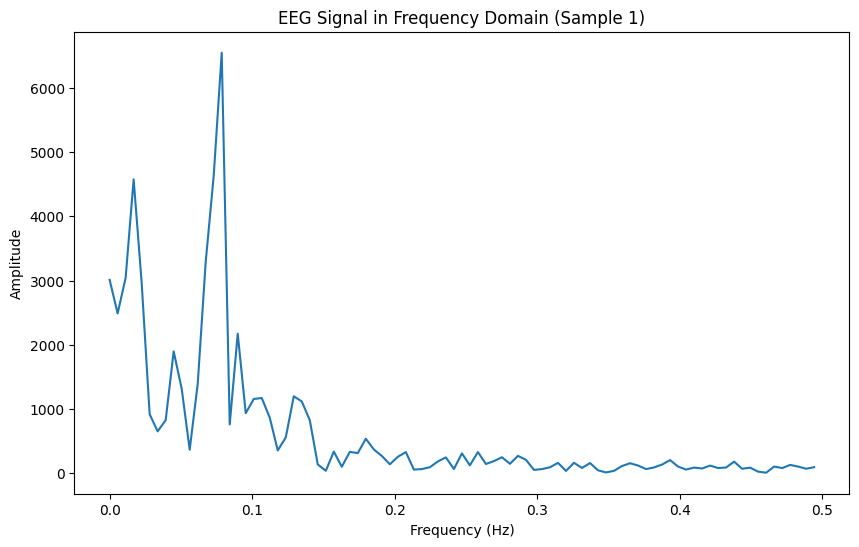

In [41]:
import numpy as np

# Perform FFT on the first sample
sample_signal = df.iloc[0, 1:-1]
fft_values = np.fft.fft(sample_signal)
frequencies = np.fft.fftfreq(len(sample_signal))

# Plot the FFT result (frequency domain)
plt.figure(figsize=(10, 6))
plt.plot(frequencies[:len(frequencies)//2], np.abs(fft_values)[:len(frequencies)//2])
plt.title('EEG Signal in Frequency Domain (Sample 1)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.show()


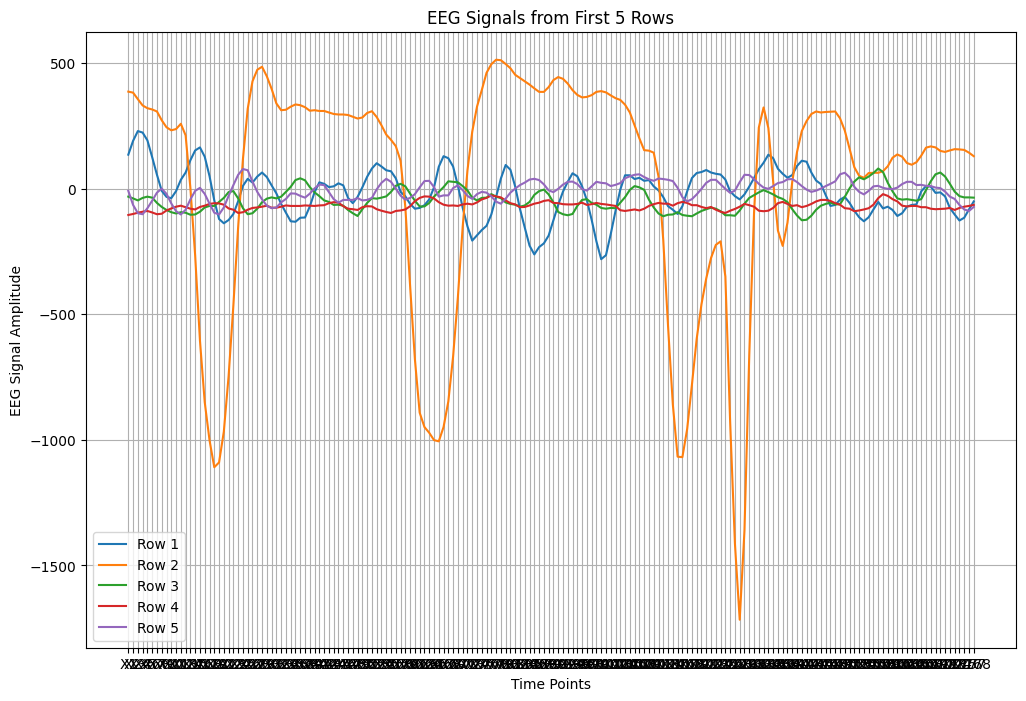

In [42]:
plt.figure(figsize=(12, 8))

for i in range(5):
    eeg_signal = df.iloc[i, 1:-1].astype(float)
    plt.plot(eeg_signal, label=f'Row {i + 1}')

plt.xlabel('Time Points')
plt.ylabel('EEG Signal Amplitude')
plt.title('EEG Signals from First 5 Rows')
plt.legend()
plt.grid(True)
plt.show()

In [43]:
df['y']=df['y'].replace([2,3,4,5],0)


In [44]:
df.head()

,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,0
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,0
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,0
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,0


In [45]:
df.y.value_counts()

y
0    9200
1    2300
Name: count, dtype: int64

In [46]:
df=df.drop(['Unnamed'], axis=1)

In [47]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,135,190,229,223,192,125,55,-9,-33,-38,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,0
1,386,382,356,331,320,315,307,272,244,232,...,164,150,146,152,157,156,154,143,129,1
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,57,64,48,19,-12,-30,-35,-35,-36,0
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,0
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,4,2,-12,-32,-41,-65,-83,-89,-73,0


In [48]:
X  = df.drop(['y'], axis=1)
y = df['y']

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test,y_test,test_size=0.5,random_state=42)

In [50]:
X_val

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178
1313,-14,-22,-20,-16,-2,0,-3,-9,-3,-4,...,4,11,3,-4,-9,-12,-17,-9,7,25
3132,-129,-120,-132,-147,-161,-132,-101,-81,-94,-91,...,-92,-103,-106,-106,-107,-105,-112,-124,-127,-125
2932,-7,-4,-2,-7,-13,-24,-29,-14,-6,-2,...,21,14,4,11,19,15,10,-1,-1,3
8613,-96,-76,-65,-45,-38,-42,-38,-38,-47,-42,...,-22,-27,-32,-35,-43,-46,-48,-46,-37,-34
3382,-493,-312,-285,-430,-621,-864,-885,-720,-406,-135,...,379,132,-76,-168,-183,-142,-234,-220,-80,417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10184,11,2,-4,-7,-12,-21,-24,-25,-24,-23,...,-13,-15,-6,-11,-16,-7,-7,-5,-10,-7
5900,344,267,153,17,-96,-223,-386,-561,-689,-631,...,-532,-406,-277,-142,-15,151,246,331,303,227
11279,-133,-127,-133,-134,-123,-113,-91,-82,-79,-92,...,-13,-38,-50,-74,-96,-109,-128,-120,-122,-102
5844,128,-154,-380,-525,-561,-502,-384,-259,-208,-233,...,946,864,725,569,415,266,90,-80,-187,-239


In [51]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#now we will going to scale the dataset
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

Start Building our model

In [52]:
from tensorflow.keras.layers import Dense, BatchNormalization,Dropout,LSTM,Dense,Activation,Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dropout
from tensorflow.keras import callbacks

In [53]:
X_train.shape

(6900, 178)

In [54]:
model = Sequential()


model.add(Dense(units=32,kernel_initializer='uniform',activation='relu',input_dim=178))

model.add(Dense(units=64,kernel_initializer='uniform',activation='relu'))
model.add(Dense(units=32,kernel_initializer='uniform',activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=32,kernel_initializer='uniform',activation='relu'))
model.add(Dense(units=16,kernel_initializer='uniform',activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1,kernel_initializer='uniform',activation='relu'))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 32)             │         5,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,521 (45.00 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

In [55]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [56]:
history = model.fit(X_train,y_train,batch_size=32,epochs=20,validation_split=0.2)

Epoch 1/20
173/173 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.8364 - loss: 0.8005 - val_accuracy: 0.9457 - val_loss: 0.1482
Epoch 2/20
173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9428 - loss: 0.2654 - val_accuracy: 0.9594 - val_loss: 0.1588
Epoch 3/20
173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9491 - loss: 0.2502 - val_accuracy: 0.9587 - val_loss: 0.2193
Epoch 4/20
173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9579 - loss: 0.2400 - val_accuracy: 0.9638 - val_loss: 0.2007
Epoch 5/20
173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9502 - loss: 0.2313 - val_accuracy: 0.9638 - val_loss: 0.2441
Epoch 6/20
173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9571 - loss: 0.2427 - val_accuracy: 0.9659 - val_loss: 0.2470
Epoch 7/20
173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9501 - loss: 0.2784 - val_accuracy: 0.9232 - val_loss: 0.3673
Epoch 8/20
173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9464 - loss: 0.2784 - val_accuracy: 0

In [57]:
model.layers[0].get_weights()

[array([[-2.15319525e-02, -1.89599078e-02,  6.97046667e-02, ...,
         -3.59909423e-02,  7.17318729e-02, -6.96098879e-02],
        [ 3.99090387e-02,  1.09638266e-01,  6.75414950e-02, ...,
          6.04372362e-05, -2.13229489e-02, -9.11426619e-02],
        [-9.48654860e-03,  5.50796539e-02,  8.40395764e-02, ...,
         -7.61918575e-02, -1.46837700e-02, -6.35529086e-02],
        ...,
        [ 4.40810062e-02, -2.09187828e-02,  1.28636107e-01, ...,
          6.79792184e-03, -3.02176885e-02,  1.65688712e-02],
        [-9.76435002e-03,  2.63918713e-02,  1.31197527e-01, ...,
         -2.19693594e-03, -6.83498532e-02,  2.98830140e-02],
        [-1.62804872e-02,  3.24267372e-02,  1.25954419e-01, ...,
         -3.24924253e-02, -1.26229882e-01,  1.02838278e-01]], dtype=float32),
 array([-0.2584966 , -0.29007015, -0.3157616 , -0.3127358 , -0.26338083,
        -0.20915626, -0.24059896, -0.23707527, -0.27859572, -0.22965555,
        -0.31058988, -0.29985246, -0.34288946, -0.280707  , -0.25439

In [58]:
y_log=model.predict(X_test)

72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [59]:
y_log

array([[0.       ],
       [0.       ],
       [3.1051497],
       ...,
       [0.       ],
       [1.3694894],
       [0.       ]], dtype=float32)

In [60]:
y_pred=np.where(y_log>0.5,1,0)

In [61]:
y_pred

array([[0],
       [0],
       [1],
       ...,
       [0],
       [1],
       [0]])

In [62]:
accuracy_score(y_test,y_pred)

0.9578260869565217

In [63]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred, average='binary')
f1

0.8930540242557883

In [64]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1798,   21],
       [  76,  405]])

In [65]:
a=history.history

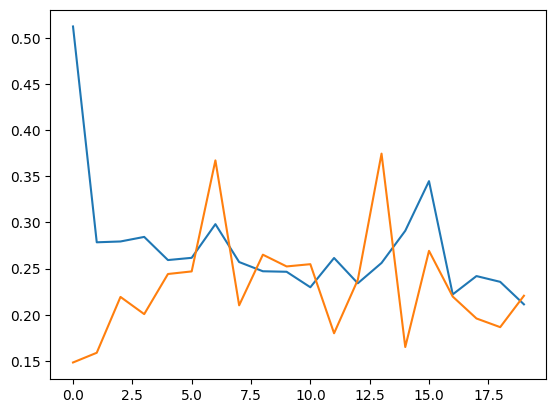

In [66]:
import matplotlib.pyplot as mlt
mlt.plot(history.history['loss'])
mlt.plot(history.history['val_loss'])

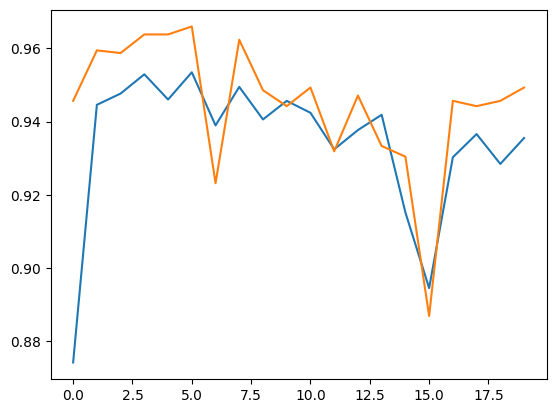

In [67]:
mlt.plot(history.history['accuracy'])
mlt.plot(history.history['val_accuracy'])

In [68]:
import pickle

In [69]:
with open("ann_model.pkl", "wb") as file:
    pickle.dump(model, file)

In [72]:
ab =pd.read_csv("TEXT.csv")
ab = scaler.fit_transform(ab)

In [73]:
y_log=model.predict(ab)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


In [74]:
y_pred=np.where(y_log>0.5,1,0)

In [75]:
y_pred

array([[0]])